### Deep Learning ile Makine Öğrenmesi 1-Classification 2- Regression 3 - Clustering

# 1 - Classification

In [43]:
!pip install tensorflow
!pip install keras

In [44]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense #bütün neronları birbirine bağlar

In [4]:
df1=pd.read_csv("ttrain.csv")

In [5]:
df2=pd.read_csv("ttest.csv")

In [6]:
df=df1.append(df2)

C:\Users\kubra\AppData\Local\Temp\ipykernel_12016\2456558213.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df1.append(df2)


In [7]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
475,476,0.0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S
165,166,1.0,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.0,0,2,363291,20.5250,NaN,S
564,565,0.0,3,"Meanwell, Miss. (Marion Ogden)",female,NaN,0,0,SOTON/O.Q. 392087,8.0500,NaN,S
503,504,0.0,3,"Laitinen, Miss. Kristina Sofia",female,37.0,0,0,4135,9.5875,NaN,S
366,367,1.0,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C


In [8]:
df.shape

(1309, 12)

In [9]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [10]:
del df["Cabin"]

In [11]:
df["Fare"].fillna(df["Fare"].mode()[0],inplace=True)

In [12]:
df["Embarked"].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [13]:
df["Embarked"].fillna("S",inplace=True)

In [14]:
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [15]:
df["Family"]=df["SibSp"]+df["Parch"]+1

In [16]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Family           0
dtype: int64

<AxesSubplot:>

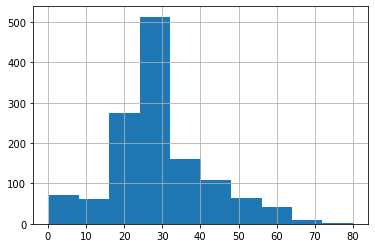

In [17]:
df["Age"].hist()

<AxesSubplot:xlabel='Embarked', ylabel='count'>

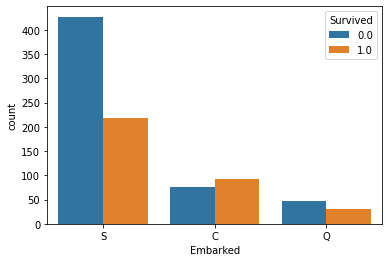

In [18]:
sns.countplot(x=df["Embarked"],hue=df["Survived"])

In [19]:
df["Name"].value_counts()

Connolly, Miss. Kate                                   2
Kelly, Mr. James                                       2
Braund, Mr. Owen Harris                                1
Johnson, Master. Harold Theodor                        1
Gustafsson, Mr. Alfred Ossian                          1
                                                      ..
Carter, Miss. Lucile Polk                              1
Silvey, Mr. William Baird                              1
Kallio, Mr. Nikolai Erland                             1
Louch, Mrs. Charles Alexander (Alice Adelaide Slow)    1
Peter, Master. Michael J                               1
Name: Name, Length: 1307, dtype: int64

In [20]:
df["Title"]=df["Name"].str.extract("([A-Za-z]+)\.",expand=False)
df["Title"]=df["Title"].replace(["Ms","Mlle"],"Miss")
df["Title"]=df["Title"].replace(["Mme","Countess","Lady","Dona"],"Mrs")
df["Title"]=df["Title"].replace(["Dr","Major","Col","Capt","Sir","Rev","Jonkheer","Don"],"Mr")

In [21]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Family', 'Title'],
      dtype='object')

In [22]:
df=df.drop(columns=["Ticket"])


In [23]:
df=df.drop(columns=["Name"])

In [24]:
x=df[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp','Parch','Fare', 'Embarked', 'Family']]

In [42]:
y=df[["Survived"]]

In [26]:
x=df.iloc[:,0:9]
y=df.iloc[:,9]


In [27]:
x.shape

(1309, 9)

In [28]:
x.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,7.2500,S
1,2,1.0,1,female,38.0,1,0,71.2833,C
2,3,1.0,3,female,26.0,0,0,7.9250,S
3,4,1.0,1,female,35.0,1,0,53.1000,S
4,5,0.0,3,male,35.0,0,0,8.0500,S


In [29]:
x=pd.get_dummies(x,drop_first=True)


In [30]:
x.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0.0,3,22.0,1,0,7.2500,1,0,1
1,2,1.0,1,38.0,1,0,71.2833,0,0,0
2,3,1.0,3,26.0,0,0,7.9250,0,0,1
3,4,1.0,1,35.0,1,0,53.1000,0,0,1
4,5,0.0,3,35.0,0,0,8.0500,1,0,1


In [31]:
model=Sequential()
model.add(Dense(8,activation='relu')) #neronlar
model.add(Dense(120,activation='relu'))
model.add(Dense(60,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))



In [32]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics="accuracy")

In [46]:
model.fit(x,y,epochs=150,batch_size=15,verbose=1)

Epoch 1/150
88/88 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.4194
Epoch 2/150
88/88 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4194
Epoch 3/150
88/88 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4194
Epoch 4/150
88/88 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4194
Epoch 5/150
88/88 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4194
Epoch 6/150
88/88 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4194
Epoch 7/150
88/88 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4194
Epoch 8/150
88/88 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4194
Epoch 9/150
88/88 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4194
Epoch 10/150
88/88 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4194
Epoch 11/150
88/88 [===================

88/88 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4194
Epoch 86/150
88/88 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.4194
Epoch 87/150
88/88 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4194
Epoch 88/150
88/88 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4194
Epoch 89/150
88/88 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4194
Epoch 90/150
88/88 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.4194
Epoch 91/150
88/88 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4194
Epoch 92/150
88/88 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4194
Epoch 93/150
88/88 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4194
Epoch 94/150
88/88 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4194
Epoch 95/150
88/88 [=======================

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 88        
                                                                 
 dense_1 (Dense)             (None, 120)               1080      
                                                                 
 dense_2 (Dense)             (None, 60)                7260      
                                                                 
 dense_3 (Dense)             (None, 6)                 366       
                                                                 
 dense_4 (Dense)             (None, 4)                 28        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 8,827
Trainable params: 8,827
Non-trainabl

In [48]:
scores=model.evaluate(x,y)

41/41 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.4194


In [49]:
scores[0] #kaybı yazar  

nan

In [50]:
scores[1]

0.41940411925315857

In [51]:
#Early stopping 

In [52]:
history=model.fit(x,y,epochs=19,validation_split=0.20,batch_size=10,verbose=1)

Epoch 1/19
105/105 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.5244 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/19
105/105 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.5244 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/19
105/105 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.5244 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/19
105/105 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.5244 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/19
105/105 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.5244 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/19
105/105 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.5244 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/19
105/105 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.5244 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 8/19
105/105 [

In [53]:
import matplotlib.pyplot as plt

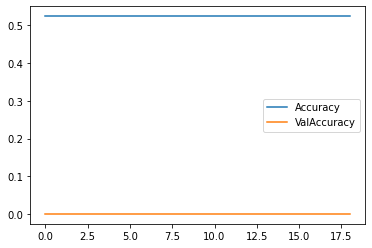

In [54]:
plt.plot(history.history["accuracy"],label="Accuracy")
plt.plot(history.history["val_accuracy"],label="ValAccuracy")
plt.legend()